## Project: Analysis and Classification of customer churn in telecommunication companies

### Author: Munezero Mihigo

### Date: 13 November 2021

## Project Objective

### The objective of the task is to predict whether the customer will churn or not.

## General Knowledge

### What is a customer churn?
 customer churn occurs when an existing customer, user, player, subscriber or any kind of return client stops doing business or ends the relationship with a company.

### Types of churn

#### Contractual churn:
 Contractual churn occurs when a customer is under contract for a service and decides to cancel their service. <br>Example: Cable TV, SaaS products (Software as a Service e.g. Dropbox).

#### Voluntary churn:
 Voluntary churn occurs when a user voluntarily cancels a service and includes prepaid cell phones, streaming subscriptions.

#### Non-contractual churn:
 Non-contractual churn ocurs when a customer is not under contract for a service and includes customer loyality at a retail location or online browsing.

#### Involuntary churn:
 Involuntary churn occurs when a churn occurs not at the request of the customer. For example: credit card expiration, utilities being shut off by the provider. <br>Most likely, you as a customer have cancelled a service for a variety of reasons including lack of usage, poor service or better price.

## Step-by-Step Process

1. data preprocessing <br>
2. One-hot Encoding <br>
3. Data Transformation (StandardScaler or MinMaxScaler) <br>
4. Grid Search and Cross-Validation with Decision Tree Classifier <br>
5. Tree diagram of the Decision Tree <br>
6. Confusion Matrix, Classification report, and ROC-AUCdata preprocessing <br>

#### Import libraries

In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.metrics import plot_confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [150]:
df = pd.read_csv("../Data/Churn_Data_set.csv")
display(df.head(5))

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,...,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State,Area_Code,Phone
0,128,25,265.1,197.4,244.7,10.0,1,no,no,yes,...,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657
1,107,26,161.6,195.5,254.4,13.7,1,no,no,yes,...,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191
2,137,0,243.4,121.2,162.6,12.2,0,no,no,no,...,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921
3,84,0,299.4,61.9,196.9,6.6,2,no,yes,no,...,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999
4,75,0,166.7,148.3,186.9,10.1,3,no,yes,no,...,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626


### Data Description

In [151]:
df.describe()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,Area_Code
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,179.775098,200.980348,200.872037,10.237294,1.562856,100.435644,30.562307,100.114311,17.083540,100.107711,9.039325,4.479448,2.764581,437.182418
std,39.822106,13.688365,54.467389,50.713844,50.573847,2.791840,1.315491,20.069084,9.259435,19.922625,4.310668,19.568609,2.275873,2.461214,0.753773,42.371290
min,1.000000,0.000000,0.000000,0.000000,23.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000,1.040000,0.000000,0.000000,408.000000
25%,74.000000,0.000000,143.700000,166.600000,167.000000,8.500000,1.000000,87.000000,24.430000,87.000000,14.160000,87.000000,7.520000,3.000000,2.300000,408.000000
50%,101.000000,0.000000,179.400000,201.400000,201.200000,10.300000,1.000000,101.000000,30.500000,100.000000,17.120000,100.000000,9.050000,4.000000,2.780000,415.000000
75%,127.000000,20.000000,216.400000,235.300000,235.300000,12.100000,2.000000,114.000000,36.790000,114.000000,20.000000,113.000000,10.590000,6.000000,3.270000,510.000000
max,243.000000,51.000000,350.800000,363.700000,395.000000,20.000000,9.000000,165.000000,59.640000,170.000000,30.910000,175.000000,17.770000,20.000000,5.400000,510.000000


### Data Preprocessing

In [152]:
df = df.drop(['State', 'Area_Code', 'Phone'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Account_Length  3333 non-null   int64  
 1   Vmail_Message   3333 non-null   int64  
 2   Day_Mins        3333 non-null   float64
 3   Eve_Mins        3333 non-null   float64
 4   Night_Mins      3333 non-null   float64
 5   Intl_Mins       3333 non-null   float64
 6   CustServ_Calls  3333 non-null   int64  
 7   Churn           3333 non-null   object 
 8   Intl_Plan       3333 non-null   object 
 9   Vmail_Plan      3333 non-null   object 
 10  Day_Calls       3333 non-null   int64  
 11  Day_Charge      3333 non-null   float64
 12  Eve_Calls       3333 non-null   int64  
 13  Eve_Charge      3333 non-null   float64
 14  Night_Calls     3333 non-null   int64  
 15  Night_Charge    3333 non-null   float64
 16  Intl_Calls      3333 non-null   int64  
 17  Intl_Charge     3333 non-null   f

### Categorical Variables

In [153]:
print(df['Vmail_Plan'].unique())
print(len(df['Vmail_Plan'].unique()))
display(df['Vmail_Plan'].value_counts())

['yes' 'no']
2


no     2411
yes     922
Name: Vmail_Plan, dtype: int64

In [154]:
print(df['Intl_Plan'].unique())
print(len(df['Intl_Plan'].unique()))
display(df['Intl_Plan'].value_counts())

['no' 'yes']
2


no     3010
yes     323
Name: Intl_Plan, dtype: int64

In [155]:
print(df['Churn'].unique())
print(len(df['Churn'].unique()))
display(df['Churn'].value_counts())

['no' 'yes']
2


no     2850
yes     483
Name: Churn, dtype: int64

### Findings
- The number of categorial feature is 2.
- The categorical feature isn't ordinal.

### One-Hot Encoding
One-Hot Encoding works better for this dataset. Because the 'Vmail_Plan' & 'Intl_Plan' features and 'Churn' target aren't ordinal and the number of categorical feature is less as it's shown above. That's why One-Hot Encoding is applied in this dataset. 

In [156]:
df = pd.get_dummies(df, drop_first=True)
display(df.sample(5))

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,Churn_yes,Intl_Plan_yes,Vmail_Plan_yes
3063,63,25,190.0,116.6,141.5,12.2,1,137,32.30,76,9.91,110,6.37,2,3.29,0,0,1
1294,66,0,87.6,262.0,184.6,9.2,1,76,14.89,111,22.27,125,8.31,5,2.48,0,0,0
2325,110,0,271.1,237.0,239.9,9.8,2,108,46.09,122,20.15,122,10.80,5,2.65,1,0,0
41,135,41,173.1,203.9,122.2,14.6,0,85,29.43,107,17.33,78,5.50,15,3.94,1,1,1
1016,41,0,143.6,152.4,194.4,8.6,1,117,24.41,108,12.95,110,8.75,3,2.32,0,0,0


In [157]:
df.shape

(3333, 18)

### Data Transformation

In [158]:
# normalize the feature columns

In [159]:
scaler = MinMaxScaler()

for col in df.columns:
    df[col] = scaler.fit_transform(df[[col]])

In [160]:
display(df)

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,Churn_yes,Intl_Plan_yes,Vmail_Plan_yes
0,0.524793,0.490196,0.755701,0.542755,0.595750,0.500,0.111111,0.666667,0.755701,0.582353,0.542866,0.408451,0.595935,0.15,0.500000,0.0,0.0,1.0
1,0.438017,0.509804,0.460661,0.537531,0.621840,0.685,0.111111,0.745455,0.460597,0.605882,0.537690,0.492958,0.622236,0.15,0.685185,0.0,0.0,1.0
2,0.561983,0.000000,0.693843,0.333242,0.374933,0.610,0.000000,0.690909,0.693830,0.647059,0.333225,0.500000,0.375374,0.25,0.609259,0.0,0.0,0.0
3,0.342975,0.000000,0.853478,0.170195,0.467187,0.330,0.222222,0.430303,0.853454,0.517647,0.170171,0.394366,0.467424,0.35,0.329630,0.0,1.0,0.0
4,0.305785,0.000000,0.475200,0.407754,0.440290,0.505,0.333333,0.684848,0.475184,0.717647,0.407959,0.619718,0.440526,0.15,0.505556,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,0.789256,0.705882,0.445268,0.592521,0.688273,0.495,0.222222,0.466667,0.445171,0.741176,0.592688,0.352113,0.688583,0.30,0.494444,0.0,0.0,1.0
3329,0.276860,0.000000,0.658780,0.421776,0.452125,0.480,0.333333,0.345455,0.658786,0.323529,0.421870,0.633803,0.452481,0.20,0.479630,0.0,0.0,0.0
3330,0.111570,0.000000,0.515393,0.794061,0.453739,0.705,0.222222,0.660606,0.515426,0.341176,0.794241,0.408451,0.454274,0.30,0.705556,0.0,0.0,0.0
3331,0.756198,0.000000,0.609464,0.438823,0.311996,0.250,0.222222,0.636364,0.609490,0.494118,0.439016,0.732394,0.312014,0.50,0.250000,0.0,1.0,0.0


### Findings
Data Transformation doesn't improve model performance of this dataset

### Separating the features and target variable

In [161]:
target = ['Churn_yes']

X = df.drop('Churn_yes', axis=1)
y = df[target]

print(X.shape, y.shape)

(3333, 17) (3333, 1)


### Create train and test set

In [162]:
# Split the dataset intro train and test set
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42, 
                                                    stratify=y)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2666, 17) (667, 17) (2666, 1) (667, 1)


### Grid Search and Cross-Validation with Decision Tree Classifier

In [163]:
parameters = {'criterion': ['gini','entropy'],
              'max_depth': [3, 4, 5, 6, 7]}

model = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(estimator = model,
                           param_grid = parameters,
                           scoring = "accuracy",
                           cv=5,
                           n_jobs=-1)

# fit the model with the best hyper-parameters
grid_result = grid_search.fit(X_train, y_train)

### Best hyperparameters in the grid search

In [164]:
grid_result.best_params_

{'criterion': 'gini', 'max_depth': 6}

### Tree Diagram

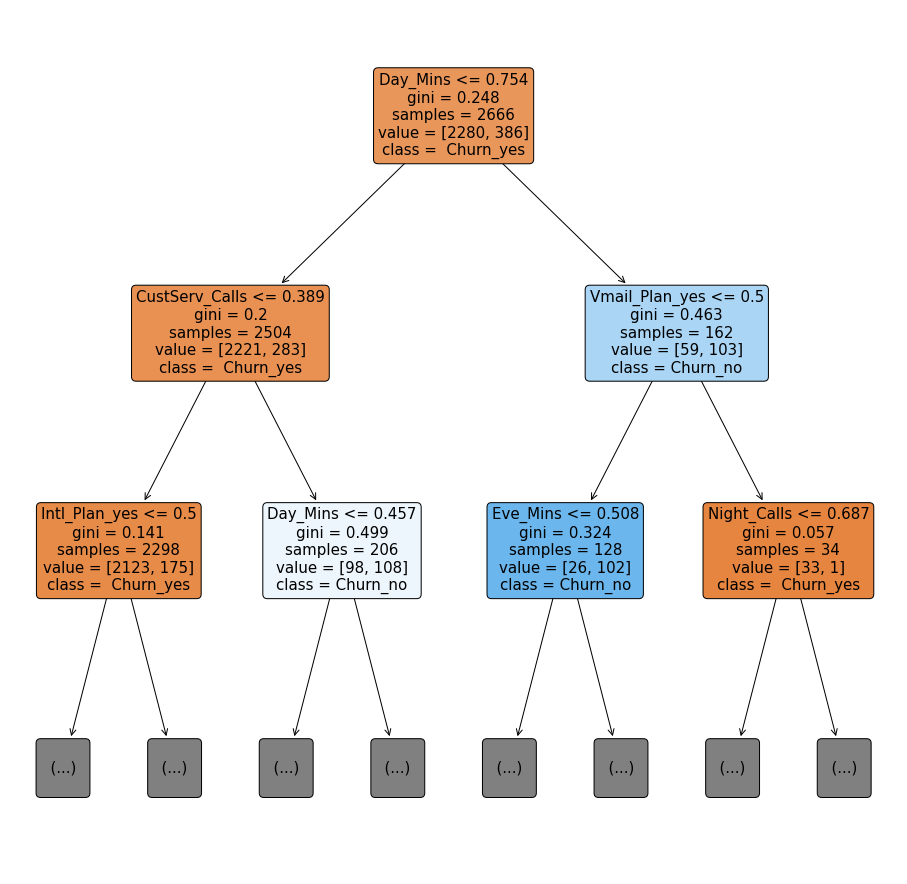

In [139]:
fig = plt.figure(figsize = (16, 16))
plot_tree(grid_result.best_estimator_, 
          filled=True,
          rounded=True,
          class_names = [" Churn_yes", "Churn_no"],
          feature_names = X.columns,
          max_depth=2, 
          fontsize=15)
fig.savefig('../Plots/Tree diagram plot.jpg', bbox_inches='tight', dpi=150)
plt.show()

### Model Performance Evaluation

In [140]:
# Confusion Matrix

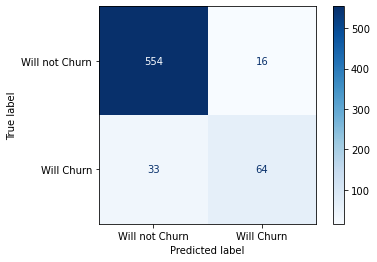

In [141]:
plot_confusion_matrix(grid_result, 
                      X_test, 
                      y_test, 
                      display_labels=["Will not Churn", "Will Churn"],
                      cmap='Blues')
plt.show()

### Prediction

In [142]:
y_pred = grid_result.predict(X_test)

### Calculate accuracy

In [143]:
print('Accuracy: ', accuracy_score(y_test, y_pred))

Accuracy:  0.9265367316341829


### Prediction Comparison with the test data

In [144]:
y_test['probability'] = np.round(grid_result.predict_proba(X_test)[:,1], 2)
y_test['predicted_Churn'] = y_pred

display(y_test.sample(10))

,Churn_yes,probability,predicted_Churn
2488,0.0,0.02,0.0
2940,0.0,0.02,0.0
1821,0.0,0.00,0.0
3260,0.0,0.07,0.0
196,0.0,0.02,0.0
2102,0.0,0.07,0.0
959,0.0,0.02,0.0
1210,0.0,0.00,0.0
1620,0.0,0.02,0.0
3259,0.0,0.02,0.0


### ROC: Receiver Operating Characterisitcs and AUC: Area Under the Curve

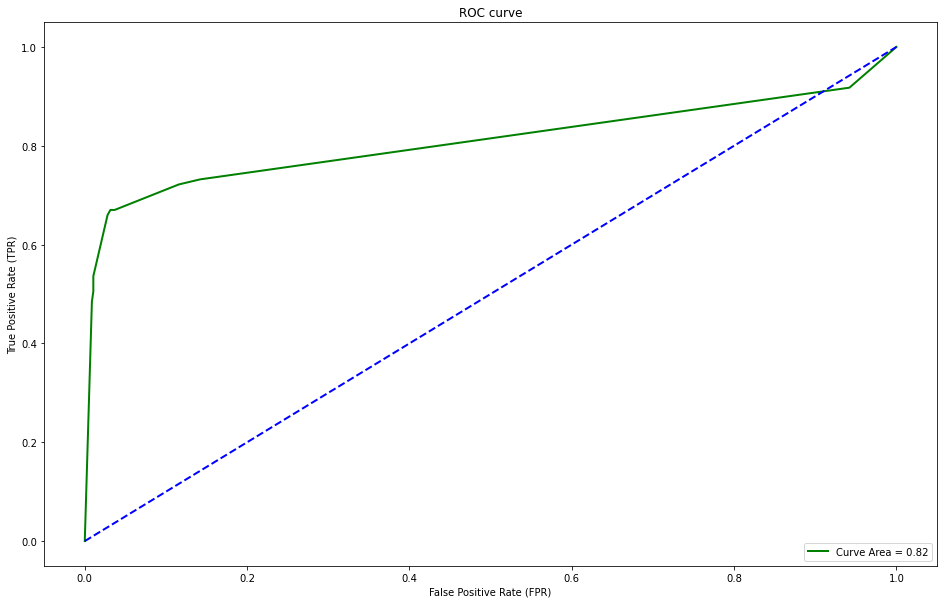

In [145]:
fpr, tpr, thr = roc_curve(y_test['Churn_yes'], 
                          y_test['probability'])
auc = np.round(roc_auc_score(y_test['Churn_yes'], 
                             y_test['predicted_Churn']), 2)

fig = plt.figure(figsize=(16, 10))
plt.plot(fpr, 
         tpr, 
         color='green', 
         lw=2, 
         label="Curve Area = " +str(auc))

plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve')
plt.legend(loc="lower right")

fig.savefig('../Plots/ROC curve plot.jpg', bbox_inches='tight', dpi=150)
plt.show()

### Classification report

In [146]:
class_report = classification_report(y_test['Churn_yes'], 
                                     y_test['predicted_Churn'])

In [147]:
print("Classification Report: \n", class_report)

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.94      0.97      0.96       570
         1.0       0.80      0.66      0.72        97

    accuracy                           0.93       667
   macro avg       0.87      0.82      0.84       667
weighted avg       0.92      0.93      0.92       667



### Findings

Since the value of precision, recall, f1-score and accuracy is closer to 1, so the decision tree model performs well in this dataset

In [148]:
##### END #####